In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
news = pd.read_csv("C://Users//arkad//Desktop//Projs//FakeNewsDetection//news.csv")
#data.head()
print('Rows: ', news.shape[0])
print('Columns: ', news.shape[1])
print('Column names: ', news.columns.values)

Rows:  6335
Columns:  4
Column names:  ['Unnamed: 0' 'title' 'text' 'label']


In [3]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [4]:
news.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [5]:
news.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
labels = news['label'].value_counts()
#print('labels:', labels)

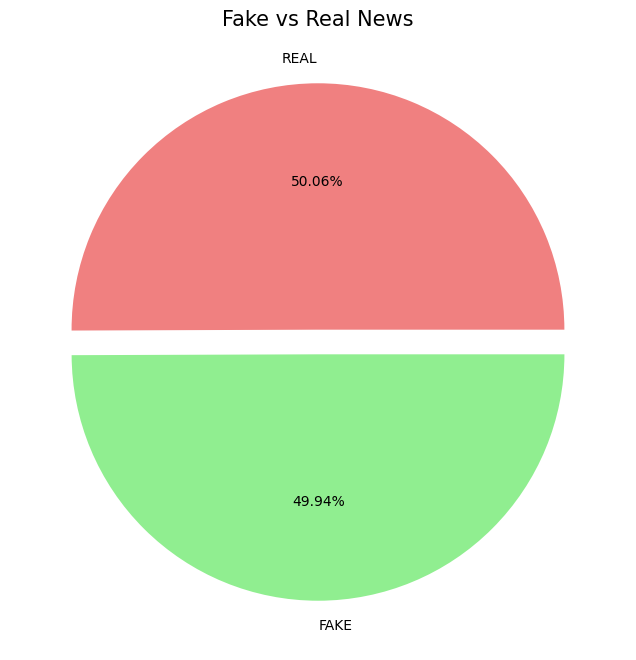

In [7]:
plt.figure(figsize=(10, 8))
plt.pie(labels.values, labels=labels.index, autopct='%.2f%%', explode=([0.05]*len(labels.index)), colors=['lightcoral','lightgreen'])
plt.title('Fake vs Real News', fontsize=15)
plt.show()

In [8]:
import spacy
kevin = spacy.load('en_core_web_lg')

In [9]:
news['TextVector'] = news['text'].apply(lambda x: kevin(x).vector)

In [10]:
news_copy = news.copy()
news_copy.drop(columns=['title', 'text'], axis =1, inplace=True)

In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(news_copy, test_size=0.2, random_state=420)
print('Train Shape: ', train.shape)
print('Test Shape: ', test.shape)

Train Shape:  (5068, 2)
Test Shape:  (1267, 2)


In [12]:
xtrain = train['TextVector']
ytrain = train['label']

xtest = test['TextVector']
ytest = test['label']

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
ytrain_encoded = encoder.fit_transform(ytrain)
ytest_encoded = encoder.transform(ytest)

In [14]:
xtrain = np.array(xtrain)
xtest = np.array(xtest)

xtrain_2d = np.stack(xtrain)
xtest_2d = np.stack(xtest)

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
xtrain_scaled = scaler.fit_transform(xtrain_2d)
xtest_scaled = scaler.transform(xtest_2d)

In [18]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
mnb = clf.fit(xtrain_scaled, ytrain_encoded)

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

ypred = mnb.predict(xtest_scaled)

report = classification_report(ytest_encoded, ypred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.71      0.77       634
           1       0.75      0.87      0.80       633

    accuracy                           0.79      1267
   macro avg       0.80      0.79      0.79      1267
weighted avg       0.80      0.79      0.79      1267



<Axes: >

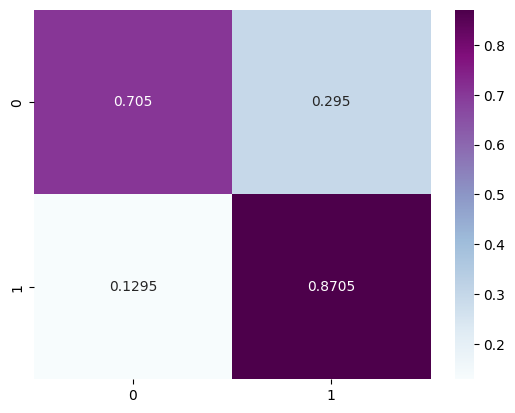

In [21]:
cnfsnmx =  confusion_matrix(ytest_encoded, ypred, normalize = 'true')

plt.figure()
sns.heatmap(cnfsnmx, annot=True, cmap = 'BuPu', fmt = '.4g')